# Clustering

Rionaldi Chandraseta - 13515077

In [267]:
import matplotlib.pyplot as plt
from itertools import combinations

%matplotlib inline

def visualize_iris_3d(df_X, labels):
    coms = combinations([0,1,2,3], 3)
    elevation = [10, 10, 10, 10]
    azimuth = [45, 45, 45, 45]
    for idx, com in enumerate(coms):
        ax = plt.axes(projection='3d')
        ax.scatter3D(df_X.values[:, com[0]], df_X.values[:, com[1]], df_X.values[:, com[2]], c=labels, cmap='copper')
        ax.set_xlabel(df_X.columns[com[0]])
        ax.set_ylabel(df_X.columns[com[1]])
        ax.set_zlabel(df_X.columns[com[2]])
        ax.view_init(elevation[idx], azimuth[idx])
        plt.show()

## Read Dataset

### Iris

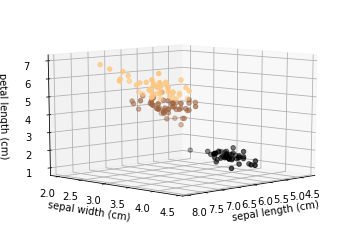

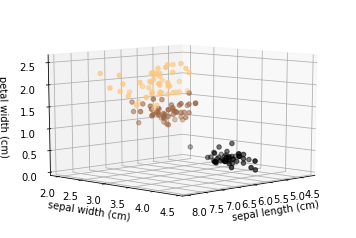

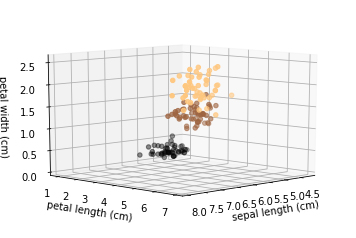

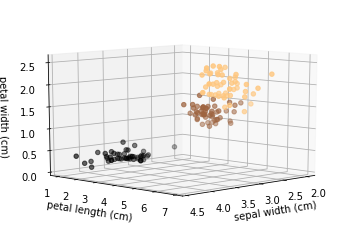

In [268]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

iris_dataset = datasets.load_iris()
iris_dataframe = pd.DataFrame(data=np.c_[iris_dataset['data'], iris_dataset['target']],
                              columns=iris_dataset['feature_names'] + ['target'])

iris_X = iris_dataframe.iloc[:, 0:4]
iris_y = iris_dataframe.iloc[:, 4:]

visualize_iris_3d(iris_X, iris_dataframe.target)

### Play Tennis

In [26]:
import pandas as pd

play_tennis_dataframe = pd.read_csv('../data/play_tennis.csv', sep=',')

pt_X = play_tennis_dataframe.iloc[:, 0:4]
pt_y = play_tennis_dataframe.iloc[:, 4:]

play_tennis_dataframe

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,norml,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


## K-Means

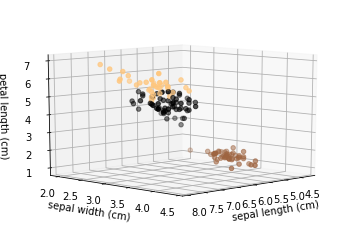

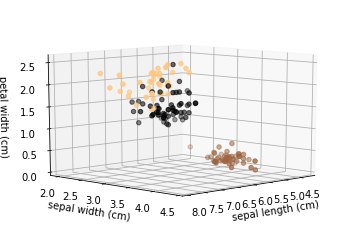

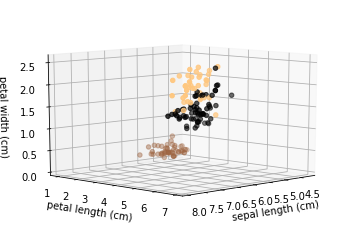

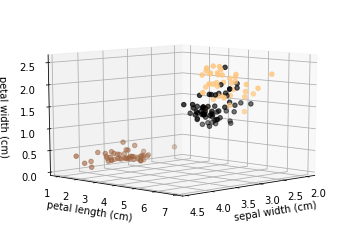

In [269]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3)
k_means.fit(iris_X)

visualize_iris_3d(iris_X, k_means.labels_)

Parameter yang bisa digunakan oleh KMeans:
- n_clusters
- init
- n_init
- max_iter
- tol
- precompute_distances
- verbose
- random_state
- copy_x
- n_jobs
- algorithm

## Agglomerative Clustering

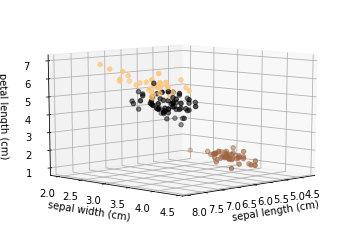

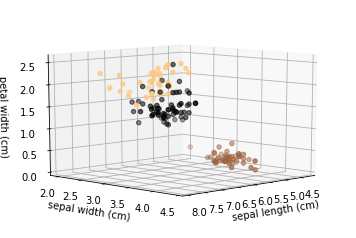

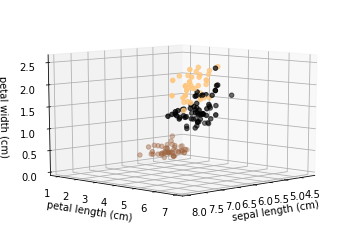

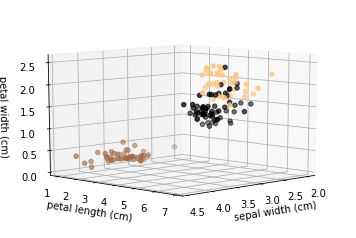

In [270]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(iris_X)

visualize_iris_3d(iris_X, agg_clustering.labels_)

Parameter yang bisa digunakan oleh Agglomerative Clustering:
- n_clusters
- affinity
- memory
- connectivity
- compute_full_tree
- linkage
- pooling_func

## DBSCAN

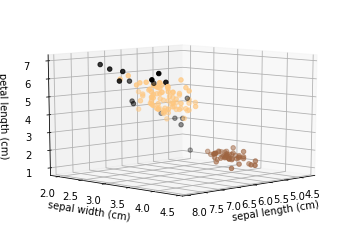

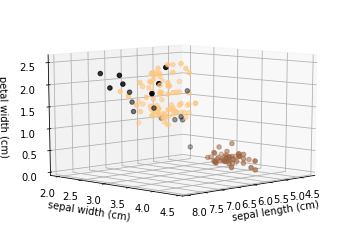

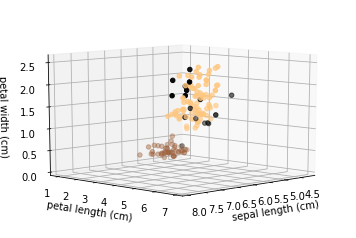

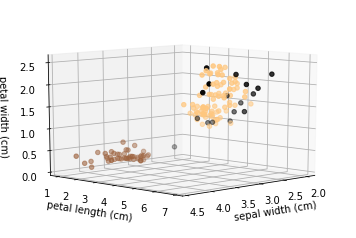

In [271]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan.fit(iris_X)

visualize_iris_3d(iris_X, dbscan.labels_)

Parameter yang bisa digunakan oleh DBSCAN:
- eps
- min_samples
- metric
- metric_params
- algorithm
- leaf_size
- p
- n_jobs

## Gaussian Mixtures

In [139]:
from sklearn.mixture import GaussianMixture

gauss_mix = GaussianMixture()
gauss_mix.fit(iris_X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Parameter yang bisa digunakan oleh Gaussian Mixture:
- n_components
- covariance_type
- tol
- reg_covar
- max_iter
- n_init
- init_params
- weights_init
- means_init
- precisions_init
- random_state
- warm_start
- verbose
- verbose_interval

## K-Medoids 

Menggunakan library [pyclustering](https://pypi.org/project/pyclustering/)

11


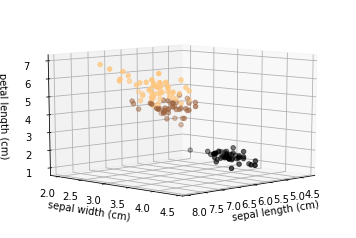

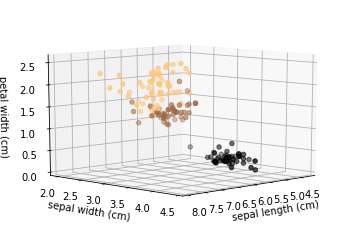

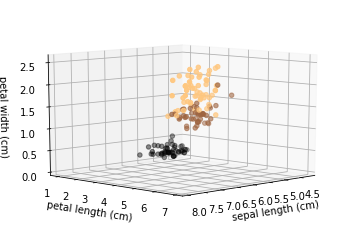

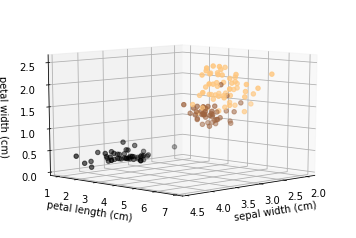

In [277]:
from pyclustering.cluster.kmedoids import kmedoids

initial_medoids = [0, 75, 149]
k_medoids = kmedoids(iris_X.values, initial_medoids)
k_medoids.process()

k_medoids_clusters = k_medoids.get_clusters()

k_medoids_labels = [0] * len(iris_y)

for label, cluster in enumerate(k_medoids_clusters):
    for index in cluster:
        k_medoids_labels[index] = label

k_medoids_diff = 0
for idx, y in enumerate(iris_y.values):
    if k_medoids_labels[idx] != y:
        k_medoids_diff += 1

print(k_medoids_diff)
        
visualize_iris_3d(iris_X, k_medoids_labels)

Parameter yang bisa digunakan oleh K-Medoids:
- data
- initial_index_medoids
- tolerance
- ccore

## Graph-Based Clustering

Menggunakan library [mst_clustering](https://pypi.org/project/mst_clustering/)

48


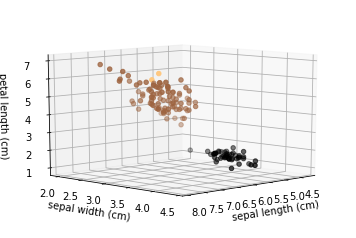

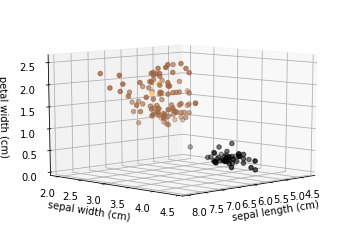

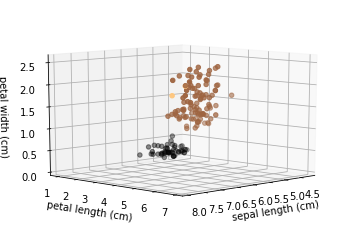

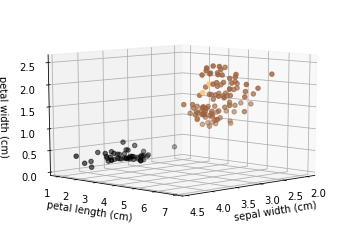

In [279]:
from mst_clustering import MSTClustering

gb_clustering = MSTClustering(cutoff=2)
gb_clustering_labels = graph_based_clustering.fit_predict(iris_X)

gb_clustering_diff = 0
for idx, y in enumerate(iris_y.values):
    if gb_clustering_labels[idx] != y:
        gb_clustering_diff += 1

print(gb_clustering_diff)

visualize_iris_3d(iris_X, gb_clustering_labels)

## Grid Clustering

## Generating Data

In [ ]:
iris_setosa = iris_dataframe[(iris_dataframe.target == 0)]
iris_versicolor = iris_dataframe[(iris_dataframe.target == 1)]
iris_virginica = iris_dataframe[(iris_dataframe.target == 2)]

## TODO

- Find mean and std of every column in every class (setosa, versicolor, virginica)
- Plot data
- Generate new data by using the same data distribution (hopefully Normal) + epsilon (Gaussian)
- Classify new data, plot